### ray tracing tutorial
explore relativistic effects in black hole images

In [1]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib; matplotlib.rcParams['image.cmap']='inferno'

function to **read position.dat file** from **ray_tracing_tutorial.cpp**<br>
output order is alpha, beta, r, phi, order, g, intensity_disk, , time, intensity_synch<br>
(alpha,beta) are (x,y) camera coordinates with spin axis pointing up<br>
(r,phi) are ray coordinates in the equatorial plane when whichstop==DISK<br>
(time) is the coordinate at either the black hole or large radius when whichstop==SHADOW<br>
order is how many times the photon orbits the black hole and g is the redshift factor<br>
intensities are for a blackbody disk and a toy model similar to synchrotron radiation as seen by the EHT<br>

In [2]:
def read_output(name='position.dat'):
    file=open(name,'r')
    header=file.readline().split()#n=128; a=0.9
    file.close()
    n=np.int(header[0]); a=np.float(header[1])
    data=np.genfromtxt(name,dtype='str',skip_header=1)
    alpha=np.array(data[:,0],dtype=float); beta=np.array(data[:,1],dtype=float)
    r=np.array(data[:,2],dtype=float)
    phi=-np.pi/2.-np.array(data[:,3],dtype=float)
    intensity_disk=np.array(data[:,6],dtype=float)
    time=np.array(data[:,8],dtype=float)
    intensity_synch=np.array(data[:,9],dtype=float)
    g=np.array(data[:,5],dtype=float)
    return n,a,alpha,beta,r,phi,intensity_disk,time,intensity_synch

### each time you run ray_tracing_tutorial.cpp the position.dat file will be overwritten

below we assume the original position.dat will be copied to a new file name for each problem (e.g. position_grid.dat for this one)

problems I/II can be run from the same output (#define whichstop DISK)

problems III/IV can be run from the same output (#define whichstop SHADOW)

### I. mapping a distant camera onto the equatorial plane

our grid of pixels was uniformly sampled on a distant camera. what does it look like when mapped to the equatorial plane of the black hole?

time permitting it's interesting to compare figures at low/high spin and viewing inclination angle

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, '$\\beta$ ($r_g$)')

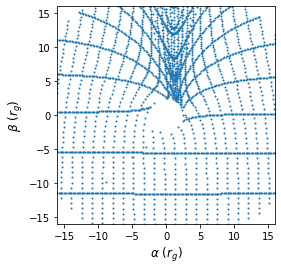

In [3]:
n,a,alpha,beta,r,phi,intensity_disk,time,intensity_synch = read_output(name='position_grid.dat')
npts=32; nsamp=n//npts; lim=16.
reff=np.sqrt(r**2.+a**2.)
x=(reff*np.cos(phi)).reshape((n,n)); y=(reff*np.sin(phi)).reshape((n,n))
plt.plot(x[::nsamp],y[::nsamp],marker='.',linestyle='',color='C0',markersize=2)
plt.plot(x[:,::nsamp],y[:,::nsamp],marker='.',linestyle='',color='C0',markersize=2)
plt.axis([-lim,lim,-lim,lim])
plt.axes().set_aspect('equal')
plt.xlabel(r'$\alpha$ ($r_g$)',fontsize=12); plt.ylabel(r'$\beta$ ($r_g$)',fontsize=12)

### II. A thin accretion disk image (cf *Interstellar*)

model of a thin disk in Keplerian rotation in the equatorial plane emitting as a blackbody with Teff ~ R^-3/4

what would such an image look like in Newtonian gravity? what relativistic effects can you identify? 

can you name one that is **missing** in the Interstellar image?

Text(0, 0.5, '$\\beta$ ($r_g$)')

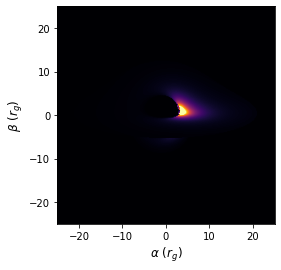

In [4]:
plt.imshow(intensity_disk.reshape((n,n)),origin='lower',extent=[np.min(alpha),np.max(alpha),np.min(beta),np.max(beta)],interpolation='bilinear',vmax=np.max(intensity_disk)*0.5)
plt.xlabel(r'$\alpha$ ($r_g$)',fontsize=12); plt.ylabel(r'$\beta$ ($r_g$)',fontsize=12)

### III. The shadow of a black hole

now re-compile ray_tracing_tutorial.cpp with #define whichstop SHADOW

also change fov=0.025 and theta0 to 20 deg

then re-run and re-name the file as position_shadow.dat

what does it mean that the central region is dark? what happens to photons traveling from those points on the camera?

Text(0, 0.5, '$\\beta$ ($r_g$)')

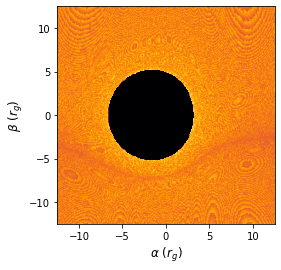

In [5]:
n,a,alpha,beta,r,phi,intensity_disk,time,intensity_synch = read_output(name='position_shadow.dat')
plt.imshow(time.reshape((n,n)),vmin=0.9*np.max(time),vmax=0.99*np.max(time),extent=[np.min(alpha),np.max(alpha),np.min(beta),np.max(beta)],interpolation='bilinear')
plt.xlabel(r'$\alpha$ ($r_g$)',fontsize=12); plt.ylabel(r'$\beta$ ($r_g$)',fontsize=12)

### IV. A toy model EHT image

now make an image of our toy emissivity intensity_synch meant to mimic emission concentrated very close to the black hole in gas rotating at relativistic speeds. 

Does it match the salient features of the EHT image?

What are the sharp spikes in the 1D cross section in the x direction? Why is one higher than the other?

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

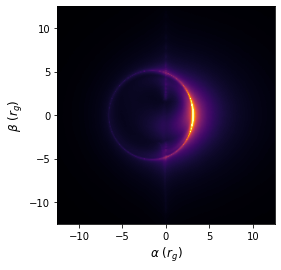

<Figure size 360x288 with 0 Axes>

In [6]:
alpha1=alpha.reshape((n,n))[:,0]
beta1=beta.reshape((n,n))[0,:]
plt.imshow((intensity_synch).reshape((n,n)),origin='lower',extent=[np.min(alpha1),np.max(alpha1),np.min(beta1),np.max(beta1)],interpolation='bilinear',vmax=0.5*np.max(intensity_synch))
plt.xlabel(r'$\alpha$ ($r_g$)',fontsize=12); plt.ylabel(r'$\beta$ ($r_g$)',fontsize=12)
plt.figure(figsize=(5,4))
plt.plot(alpha1,(intensity_synch).reshape((n,n))[n/2])
plt.xlim(-10.,10.)
plt.xlabel(r'$\alpha$ ($r_g$)',fontsize=12); plt.ylabel(r'Intensity',fontsize=12)

bonus: try blurring it to the EHT resolution (~20 microarcseconds FWHM or here ~55 pixels FWHM, ~23 pixels sigma)

multiple ways to convolve 2D arrays in python including with scipy and astropy